#Importing all the libraries required and installation

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
#   %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
 !pip install hypopt

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
 
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
 
# Importing hypopt library for grid search
from hypopt import GridSearch
 
# Importing Keras libraries
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras import backend as K

#Importing libraries

import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from sklearn.metrics import confusion_matrix
import os
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


#Mounting the Googel drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pwd

'/home/jupyter'

In [ ]:
cd LifelogData 

/home/jupyter/LifelogData


#Command to refer the storage bucket in AI jupyter notebook

In [ ]:
!gsutil -m cp -r gs://training-bucket02/Final_10_cat.zip .

Copying gs://training-bucket02/Final_10_cat.zip...
- [1/1 files][  4.0 GiB/  4.0 GiB] 100% Done  37.2 MiB/s ETA 00:00:00           
Operation completed over 1 objects/4.0 GiB.                                      


In [ ]:
pwd

'/home/jupyter/LifelogData'

In [ ]:
!unzip Final_10_cat.zip

Archive:  Final_10_cat.zip
   creating: Final 10 cat/
   creating: Final 10 cat/test/
   creating: Final 10 cat/test/Casual conversation/
  inflating: Final 10 cat/test/Casual conversation/20160817_125026_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_130037_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_130606_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_131014_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_131717_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_132025_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_132112_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_132815_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_133531_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_134542_000.jpg  
  inflating: Final 10 cat/test/Casual conversation/20160817_134629_000.jpg  
  inflating: Fi

In [ ]:
# PATH = os.path.join(root_dir, '/content/gdrive/My Drive/Lifelog_Dataset')

In [ ]:
pwd

'/home/jupyter/LifelogData'

#Creating labels by Imagedatagenerator

In [ ]:
train_dir = os.path.join('Final 10 cat/train')
Validation_dir = os.path.join('Final 10 cat/val')
test_dir = os.path.join('Final 10 cat/test')

# #Creating Category Labels

# from glob import glob
#folders = glob('/content/gdrive/My Drive/Lifelog_Dataset/new_Train')
#print(folders)
train_labels = []
New_train_img_arrayabels = []
Validation_labels = []
Test_labels = []

In [ ]:
# Show pictures
import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

def show_pictures(path,name):
    for x in name : 
        z = os.path.join(path +'/' + x)
        random_img = random.choice(os.listdir(z))
        img_path = os.path.join(z, random_img)

        img = image.load_img(img_path, target_size=(224, 224))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
        plt.imshow(img_tensor)
        print(x)
        plt.show()

In [ ]:
# for i in range(0,1):
#     show_pictures(train)

# for x in train :
#     show_imgs(train)
# #     print(x)
img_height = 224
img_width = 224
batch_size = 16

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="sparse",
    batch_size=16,
    shuffle=False
)

test_batches = ImageDataGenerator().flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="sparse",
    batch_size=16,
    shuffle=False
)

valid_batches = ImageDataGenerator().flow_from_directory(
    Validation_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="sparse",
    batch_size=16,
    shuffle=False
)
 
batch_size = 16
img_height = 224
img_width = 224


Found 11713 images belonging to 10 classes.
Found 3912 images belonging to 10 classes.
Found 3902 images belonging to 10 classes.


In [ ]:
len(train_batches)

733

In [ ]:
len(test_batches)

245

In [ ]:
len(valid_batches)

244

In [ ]:
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 10

#Fine tuning Approch 1- Replacing last layer

In [ ]:
VGG19_model = VGG19(input_tensor = Input(shape=(img_rows, img_cols, channel)),weights='imagenet', include_top=True)

In [ ]:
VGG19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in VGG19_model.layers[:-1]:
    #l_cnt =  l_cnt + 1
    layer.trainable = False
    #print(l.name, l.trainable)

for layer in VGG19_model.layers[-1:]:
    #l_cnt =  l_cnt + 1
    layer.trainable = True
    #print(l.name, l.trainable)

last_layer = VGG19_model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
VGG19_model1 =  Model(inputs=VGG19_model.input, outputs=out)
VGG19_model1.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
def get_f1(y_true, y_pred): #taken from old keras source code
 true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
 possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
 predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
 precision = true_positives / (predicted_positives + K.epsilon())
 recall = true_positives / (possible_positives + K.epsilon())
 f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
 return f1_val

In [ ]:
checkpoint_path = "weights/20/cpVgg19_10.ckpt"
# checkpoint_path = "training/cpres_1.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
checkpoint_path = "/content/gdrive/My Drive/Weights Saved/26 epochs onwards/cpVgg19_15.ckpt"
# checkpoint_path = "training/cpres_1.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
 latest = tf.train.latest_checkpoint(checkpoint_dir)
 latest

In [ ]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=3)

In [ ]:
# Save the weights using the `checkpoint_path` format
VGG19_model1.save_weights(checkpoint_path.format(epoch=0))

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
VGG19_model1.load_weights(latest)

In [ ]:
 VGG19_model1.load_weights("weights/30/VGG19_model1.h5")

In [ ]:
from keras.utils.np_utils import to_categorical
def model_generator(ref_model,epochs_count):
  ref_model.compile(loss='sparse_categorical_crossentropy',optimizer= SGD(lr=0.0001),metrics=['sparse_categorical_accuracy'])
  r = ref_model.fit(
  train_batches,
  validation_data = (valid_batches),
  epochs=epochs_count,
  callbacks=[cp_callback],
  validation_steps=len(valid_batches),
  verbose = 1,
  shuffle=True,
  )

In [ ]:
def result_prediction(model,test_batches):
  prediction = model.predict(test_batches,verbose=1,steps=1)
  prediction = np.round(prediction[:,0])
  return prediction

In [ ]:
def saving_plotting_results(prediction,model_name):
 # from sklearn.metrics import confusion_matrix
  #test_imgs,test_labels = next(test_batches)
  #cm = confusion_matrix(test_labels,prediction)
  #print(cm)
  from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,log_loss
  from prettytable import PrettyTable
  from sklearn.metrics import f1_score
  print("\n"+model_name+"Scores:")
  t = PrettyTable(['Accuracy','Precision','Recall','F1 Score'])
  t.add_row(["{:.2%}".format(accuracy_score(test_batches.classes, prediction)),"{:.2%}".format(precision_score(test_batches.classes, prediction, average='macro')),"{:.2%}".format(recall_score(test_batches.classes, prediction, average='macro')),"{:.2%}".format(f1_score(test_batches.classes, prediction, average='macro'))])
  print(t)  

##Compiling the model

In [ ]:
#20 epochs

In [ ]:
  VGG19_model1.compile(loss='sparse_categorical_crossentropy',optimizer= SGD(lr=0.0001),metrics=['sparse_categorical_accuracy'])
  history = VGG19_model1.fit(
  train_batches,
  validation_data = (valid_batches),
  epochs=20,
  callbacks=[cp_callback],
  validation_steps=len(valid_batches),
  verbose = 1,
  shuffle=True,
  )

Epoch 1/20
733/733 [==============================] - ETA: 0s - batch: 366.0000 - size: 15.9795 - loss: 1.7000 - sparse_categorical_accuracy: 0.4565WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
733/733 [==============================] - 305s 416ms/step - batch: 366.0000 - size: 15.9795 - loss: 1.7000 - sparse_categorical_accuracy: 0.4565 - val_loss: 1.3063 - val_sparse_categorical_accuracy: 0.5953
Epoch 2/20
733/733 [==============================] - 224s 306ms/step - batch: 366.0000 - size: 15.9795 - loss: 1.1810 - sparse_categorical_accuracy: 0.6283 - val_loss: 1.0887 - val_sparse_categorical_accuracy: 0.6645
Epoch 3/20
733/733 [==============================] - ETA: 0s - batch: 36

In [ ]:
VGG19_model1.save_weights("weights/20/VGG19_model1.h5")

In [ ]:
np.save("Results/20/history.npy",history.history)

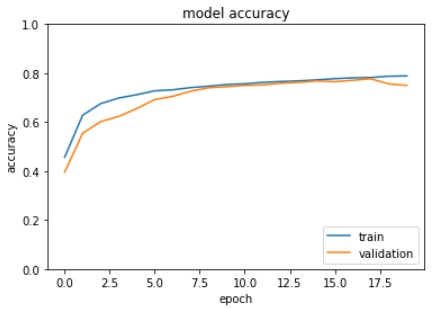

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
test_batches.reset() #Necessary to force it to start from beginning
Y_pred_20_vgg19_app1 = VGG19_model1.predict_generator(test_batches)
y_pred_20_vgg19_app1 = np.argmax(Y_pred_20_vgg19_app1, axis=-1)
#sum(y_pred==test_batches.classes)/10000

In [ ]:
np.save("Results/Y_pred_20_vgg19_app1.npy",Y_pred_20_vgg19_app1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_batches.classes,y_pred_20_vgg19_app1)

array([[137,   1,  15,   0,  16,   0,  14,  32,   0,  21],
       [  3, 418,   0,   1,   3,   0,   1,  11,   0,   0],
       [ 53,   1,  78,   0,   7,   4,   8,  10,   3,   7],
       [  2,   0,   0, 182,   8,   4,   8,   3,   0,   0],
       [  9,   0,   2,   8, 520,   0,  30,  24,   2,  16],
       [  2,   0,   0,   1,   4, 314,  51,  12,   1,   3],
       [  7,   4,   1,  13,  35,  40, 750,  18,   1,  19],
       [ 29,  15,   8,   2,  43,  10,  33, 314,   0,  40],
       [  5,   1,   1,   0,  16,   0,   3,   0, 151,   0],
       [ 35,   1,   1,   1,  11,   1,  34,  45,   1, 173]])

In [ ]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the GPU
with tf.device('/GPU:0'):
    saving_plotting_results(y_pred_20_vgg19_app1,"VGG19")


VGG19Scores:
+----------+-----------+--------+----------+
| Accuracy | Precision | Recall | F1 Score |
+----------+-----------+--------+----------+
|  77.63%  |   77.15%  | 74.37% |  75.33%  |
+----------+-----------+--------+----------+
